In [1]:
!pip install kaggle

In [ ]:
!kaggle c download titanic

In [ ]:
!unzip titanic.zip

In [2]:
import pandas as pd

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
example = pd.read_csv('gender_submission.csv')

In [4]:
train['title'] = train.Name\
    .str.split(',').apply(lambda x:x[1])\
    .str.split('.').apply(lambda x:x[0])

y = train['PassengerId']
X = train[['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked', 'title']]

X = pd.get_dummies(X, columns = ['Sex', 'Embarked', 'title'])

In [5]:
# 1 - выдернуть обращение из имени пассажира
# 2 - отобрать поля для фичей:  'Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked', 'title'
# 3 - сделать "дамми" столбцы из переменных

def make_X(t):
    t['title'] = t.Name\
        .str.split(',').apply(lambda x:x[1])\
        .str.split('.').apply(lambda x:x[0])

    #y = train['PassengerId']
    X = t[['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked', 'title']]
    return pd.get_dummies(X, columns = ['Sex', 'Embarked', 'title', 'Pclass'])

In [6]:
X_train = make_X(train)
X_test = make_X(test)

print(X_train.shape)
print(X_test.shape)

X_train, X_test = X_train.align(X_test, axis = 1)

(891, 27)
(418, 19)


In [7]:
from sklearn.linear_model import LogisticRegression

In [8]:
# FIT-PREDICT
y_predict = LogisticRegression(max_iter=500)\
    .fit(X_train.fillna(0), train.Survived)\
    .predict(X_test.fillna(0)) 

In [9]:
# сохраняем в CSV для самбита
test.PassengerId.to_frame('PassengerId')\
    .assign(Survived = y_predict)\
    .to_csv('submit.csv', index = False) 

# Занятие 2. Кроссвалидация

In [10]:
X = make_X(train)
y = train.Survived 

In [11]:
X_train.columns

Index(['Embarked_C', 'Embarked_Q', 'Embarked_S', 'Parch', 'Pclass_1',
       'Pclass_2', 'Pclass_3', 'Sex_female', 'Sex_male', 'SibSp',
       'title_ Capt', 'title_ Col', 'title_ Don', 'title_ Dona', 'title_ Dr',
       'title_ Jonkheer', 'title_ Lady', 'title_ Major', 'title_ Master',
       'title_ Miss', 'title_ Mlle', 'title_ Mme', 'title_ Mr', 'title_ Mrs',
       'title_ Ms', 'title_ Rev', 'title_ Sir', 'title_ the Countess'],
      dtype='object')

In [44]:
from sklearn.model_selection import cross_val_score, train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15)

In [13]:
X_train.shape # обучающая подвыборка из общей обучающей выборки

(757, 27)

In [14]:
X_test.shape # тестовая подвыборка из общей обучающей выборки

(134, 27)

In [15]:
train.shape # общая обучающая выборка

(891, 13)

In [16]:
print('Сделать предсказания кегглу для:', test.shape[0], 'пассажиров')

Сделать предсказания кегглу для: 418 пассажиров


In [17]:
from sklearn.linear_model import LogisticRegression

# FIT-PREDICT
y_predict = LogisticRegression(max_iter=500)\
    .fit(X_train.fillna(0), y_train)\
    .predict(X_test.fillna(0)) 
print('Размер тестовой подвыборки и предсказания для нее:', 
      y_predict.shape[0])

Размер тестовой подвыборки и предсказания для нее: 134


In [21]:
y_test.to_frame('actual')\
    .assign(predict = y_predict)\
    .to_csv('out.csv')

In [23]:
from sklearn.metrics import classification_report

In [25]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.82      0.85      0.84        82
           1       0.76      0.71      0.73        52

    accuracy                           0.80       134
   macro avg       0.79      0.78      0.79       134
weighted avg       0.80      0.80      0.80       134



In [180]:
from sklearn.model_selection import cross_val_score, train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15)
y_predict = LogisticRegression(max_iter=500)\
    .fit(X_train.fillna(0), y_train)\
    .predict(X_test.fillna(0)) 
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.74      0.85      0.79        72
           1       0.79      0.66      0.72        62

    accuracy                           0.76       134
   macro avg       0.77      0.75      0.76       134
weighted avg       0.76      0.76      0.76       134



# Кроссвалидация

In [183]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15)
# train_test_split не нужен для кроссвалидации
# кроссвалидация сама проводит train_test_split
# Поэтому кроссвалидац
lr_estimator = LogisticRegression(max_iter = 500, random_state = 42)
mean_estimation = cross_val_score(lr_estimator, X, y, scoring = 'accuracy', cv=10)
mean_estimation.mean() # среднее по оценкам

0.8215605493133584

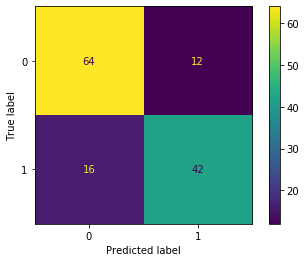

In [187]:
from sklearn.metrics import plot_confusion_matrix
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15)
plot_confusion_matrix(lr_estimator.fit(X_train,y_train), X_test, y_test)

In [194]:
['SibSp', 'Parch', 'Sex_female', 'Sex_male', 
 'Embarked_C', 'Embarked_Q', 'Embarked_S',        
 'Pclass_1', 'Pclass_2', 'Pclass_3', 'y']


Index(['SibSp', 'Parch', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q',
       'Embarked_S', 'title_ Capt', 'title_ Col', 'title_ Don', 'title_ Dr',
       'title_ Jonkheer', 'title_ Lady', 'title_ Major', 'title_ Master',
       'title_ Miss', 'title_ Mlle', 'title_ Mme', 'title_ Mr', 'title_ Mrs',
       'title_ Ms', 'title_ Rev', 'title_ Sir', 'title_ the Countess',
       'Pclass_1', 'Pclass_2', 'Pclass_3', 'y'],
      dtype='object')

c:\users\me\appdata\local\programs\python\python38\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
<ipython-input-207-fab4888eea80>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_df['Embarked_code'] = plot_df.Embarked.cat.codes
<ipython-input-207-fab4888eea80>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

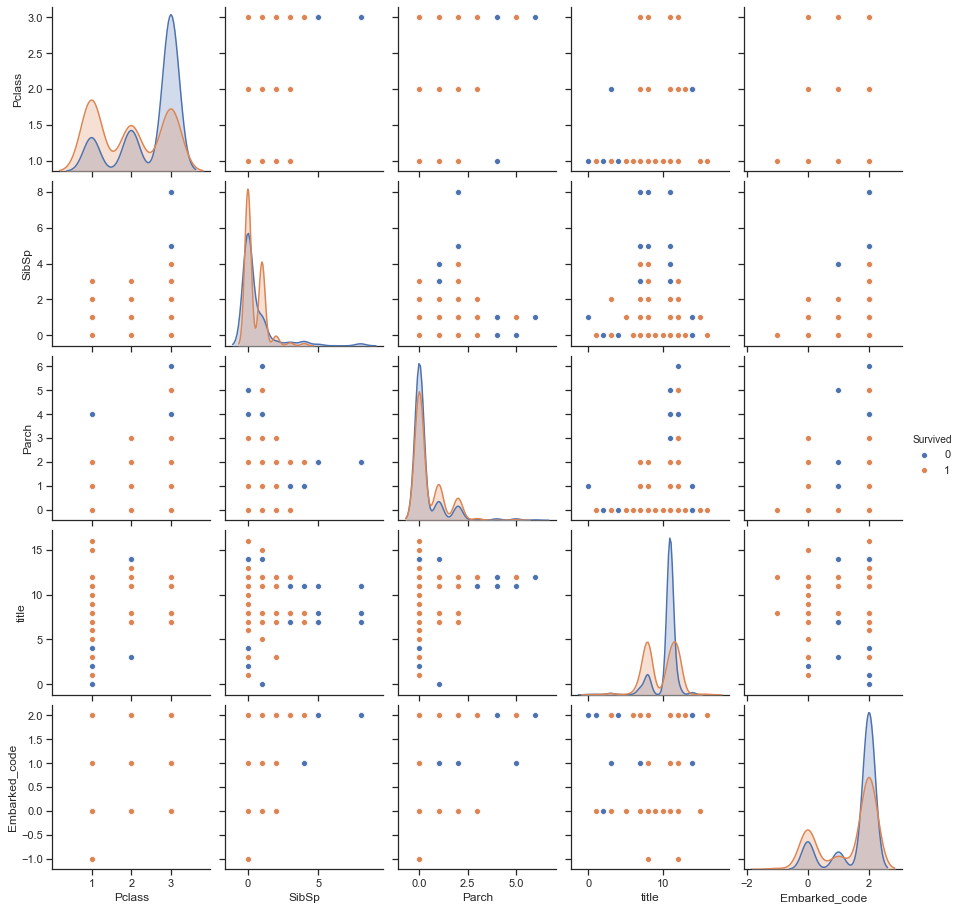

In [207]:
import seaborn as sns
sns.set(style="ticks")

plot_df = X.assign(y= y)
plot_df = train[['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked', 'title']]
plot_df.Embarked = plot_df.Embarked.astype('category')
plot_df.title = plot_df.title.astype('category')
plot_df['Embarked_code'] = plot_df.Embarked.cat.codes
plot_df['title'] = plot_df.title.cat.codes
plot_df
sns.pairplot(plot_df, hue = 'Survived')